# Letter Recognition

Import statements needed for problem

In [19]:
import keras

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.utils import normalize
from keras.callbacks import EarlyStopping

### Reading the Data from csv file

In [57]:
letter_data = pd.read_csv('/home/anushya/proj1/letter-recognition.data',sep = ',',header = None,index_col=None)
letter_data.head()
output = pd.DataFrame(letter_data[0])
output.columns = ['Alphabets']
output['alpha_numbers'] = [ ord(x) - 65 for x in output.Alphabets]
output
letter_data.drop(0,axis = 1,inplace = True)

In [58]:
output.alpha_numbers.unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

### Splitting the data

In [59]:
x_train = np.array(letter_data[:16000])
x_test = np.array(letter_data[-4000:])
y_train = np.array(output.alpha_numbers[:16000])
y_test = np.array(output.alpha_numbers[-4000:])
y_train

array([19,  8,  3, ...,  6,  4,  2])

In [60]:
batch_size = 128
num_class = len(np.unique(y_train))
epoch = 5
num_class

26

In [61]:
x_train.shape

(16000, 16)

In [62]:
x_train

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ..., 
       [ 8, 14,  7, ...,  7,  5,  8],
       [ 4,  7,  5, ...,  8,  5,  8],
       [ 2,  1,  3, ...,  9,  4, 10]])

In [63]:
x_train = normalize(x_train)
x_train

array([[ 0.07559289,  0.30237158,  0.11338934, ...,  0.30237158,
         0.        ,  0.30237158],
       [ 0.17251639,  0.41403934,  0.10350983, ...,  0.27602622,
         0.13801311,  0.34503278],
       [ 0.14557491,  0.40033099,  0.21836236, ...,  0.25475608,
         0.10918118,  0.32754354],
       ..., 
       [ 0.28980942,  0.50716649,  0.25358324, ...,  0.25358324,
         0.18113089,  0.28980942],
       [ 0.15097027,  0.26419797,  0.18871284, ...,  0.30194054,
         0.18871284,  0.30194054],
       [ 0.07495317,  0.03747658,  0.11242975, ...,  0.33728926,
         0.14990634,  0.37476584]])

In [64]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train.shape

(16000, 26)

In [65]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [200]:
train_acc = []
test_acc = []

### Model -1

In [80]:
model1 = Sequential()

In [81]:
model1.add(Dense(600, activation='tanh', input_shape=(16,)))
model1.add(Dense(500, activation='tanh'))
model1.add(Dense(26, activation='softmax'))

In [82]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_17 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_18 (Dense)             (None, 26)                13026     
Total params: 323,726
Trainable params: 323,726
Non-trainable params: 0
_________________________________________________________________


In [83]:
model1.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [84]:
history1 = model1.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
1s - loss: 1.9805 - acc: 0.4762 - val_loss: 1.3299 - val_acc: 0.6388
Epoch 2/5
1s - loss: 1.2157 - acc: 0.6650 - val_loss: 1.0694 - val_acc: 0.6928
Epoch 3/5
1s - loss: 1.0761 - acc: 0.6995 - val_loss: 0.9958 - val_acc: 0.7231
Epoch 4/5
1s - loss: 1.0189 - acc: 0.7188 - val_loss: 0.9398 - val_acc: 0.7384
Epoch 5/5
1s - loss: 0.9751 - acc: 0.7263 - val_loss: 0.9210 - val_acc: 0.7409


In [202]:
sum1 = sum(history1.history['acc'])/epoch
train_acc.append(sum1)
x,a = model1.evaluate(x_test,y_test)
test_acc.append(a)

3584/4000 [=========================>....] - ETA: 0s

In [203]:
test_acc

[0.68525000000000003]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


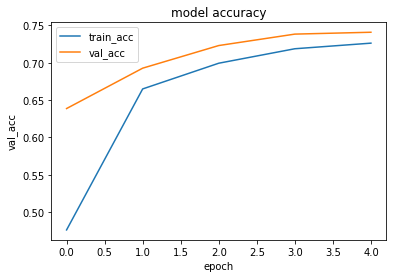

In [87]:
print(history1.history.keys())
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

# Model -2

In [96]:
model2 = Sequential()

In [97]:
model2.add(Dense(600, activation='tanh', input_shape=(16,)))
model2.add(Dense(500, activation='tanh'))
model2.add(Dense(400, activation='tanh'))
model2.add(Dense(26, activation='softmax'))

In [98]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_28 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_29 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_30 (Dense)             (None, 26)                10426     
Total params: 521,526
Trainable params: 521,526
Non-trainable params: 0
_________________________________________________________________


In [99]:
model2.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [100]:
history2 = model2.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
2s - loss: 1.7533 - acc: 0.4995 - val_loss: 1.1566 - val_acc: 0.6600
Epoch 2/5
2s - loss: 1.1221 - acc: 0.6789 - val_loss: 0.9636 - val_acc: 0.7212
Epoch 3/5
2s - loss: 0.9999 - acc: 0.7120 - val_loss: 0.8549 - val_acc: 0.7581
Epoch 4/5
2s - loss: 0.8798 - acc: 0.7420 - val_loss: 0.8334 - val_acc: 0.7472
Epoch 5/5
2s - loss: 0.7805 - acc: 0.7692 - val_loss: 0.6794 - val_acc: 0.7963


In [204]:
sum2 = sum(history2.history['acc'])/epoch
train_acc.append(sum2)
x,a = model2.evaluate(x_test,y_test)
test_acc.append(a)


3680/4000 [==========================>...] - ETA: 0s

In [205]:
test_acc

[0.68525000000000003, 0.76875000000000004]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


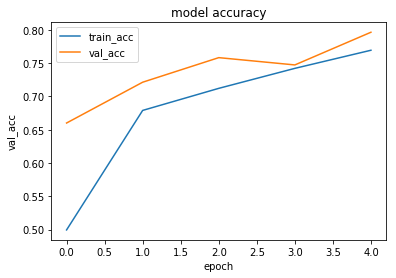

In [102]:
print(history2.history.keys())
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

### Model -3

In [106]:
model3 = Sequential()

In [107]:
model3.add(Dense(600, activation='tanh', input_shape=(16,)))
model3.add(Dense(500, activation='tanh'))
model3.add(Dense(400, activation='tanh'))
model3.add(Dense(300, activation='tanh'))
model3.add(Dense(26, activation='softmax'))

In [108]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_37 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_38 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_39 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_40 (Dense)             (None, 26)                7826      
Total params: 639,226
Trainable params: 639,226
Non-trainable params: 0
_________________________________________________________________


In [109]:
model3.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [110]:
history3 = model3.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
2s - loss: 1.6804 - acc: 0.5062 - val_loss: 1.1007 - val_acc: 0.6784
Epoch 2/5
2s - loss: 1.0782 - acc: 0.6809 - val_loss: 0.8554 - val_acc: 0.7538
Epoch 3/5
2s - loss: 0.8539 - acc: 0.7434 - val_loss: 0.6877 - val_acc: 0.7981
Epoch 4/5
2s - loss: 0.6833 - acc: 0.7903 - val_loss: 0.7125 - val_acc: 0.7669
Epoch 5/5
2s - loss: 0.5698 - acc: 0.8240 - val_loss: 0.4382 - val_acc: 0.8784


In [206]:
sum1 = sum(history3.history['acc'])/epoch
train_acc.append(sum1)
x,a = model3.evaluate(x_test,y_test)
test_acc.append(a)

3936/4000 [============================>.] - ETA: 0s

In [207]:
test_acc

[0.68525000000000003, 0.76875000000000004, 0.82250000000000001]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


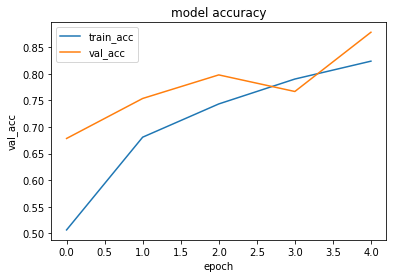

In [112]:
print(history3.history.keys())
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

### Model-4

In [116]:
model4 = Sequential()

In [117]:
model4.add(Dense(600, activation='tanh', input_shape=(16,)))
model4.add(Dense(500, activation='tanh'))
model4.add(Dense(400, activation='tanh'))
model4.add(Dense(300, activation='tanh'))
model4.add(Dense(200, activation='tanh'))
model4.add(Dense(26, activation='softmax'))

In [118]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_48 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_49 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_50 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_51 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_52 (Dense)             (None, 26)                5226      
Total params: 696,826
Trainable params: 696,826
Non-trainable params: 0
_________________________________________________________________


In [119]:
model4.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [120]:
history4 = model4.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
2s - loss: 1.7451 - acc: 0.4854 - val_loss: 1.1267 - val_acc: 0.6684
Epoch 2/5
2s - loss: 1.0184 - acc: 0.6970 - val_loss: 0.7646 - val_acc: 0.7762
Epoch 3/5
2s - loss: 0.7778 - acc: 0.7613 - val_loss: 0.7065 - val_acc: 0.7809
Epoch 4/5
2s - loss: 0.6303 - acc: 0.8092 - val_loss: 0.6338 - val_acc: 0.8059
Epoch 5/5
2s - loss: 0.5170 - acc: 0.8442 - val_loss: 0.3921 - val_acc: 0.8844


In [208]:
sum1 = sum(history4.history['acc'])/epoch
train_acc.append(sum1)
x,a = model4.evaluate(x_test,y_test)
test_acc.append(a)


3840/4000 [===========================>..] - ETA: 0s

In [209]:
test_acc

[0.68525000000000003,
 0.76875000000000004,
 0.82250000000000001,
 0.82199999999999995]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


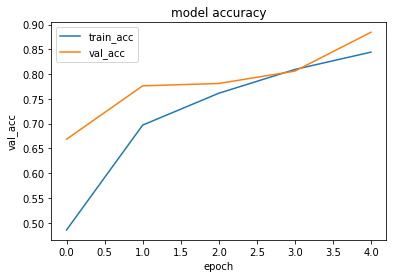

In [122]:
print(history4.history.keys())
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

###  Model -5

In [123]:
model5 = Sequential()

In [124]:
model5.add(Dense(600, activation='tanh', input_shape=(16,)))
model5.add(Dense(500, activation='tanh'))
model5.add(Dense(400, activation='tanh'))
model5.add(Dense(300, activation='tanh'))
model5.add(Dense(200, activation='tanh'))
model5.add(Dense(26, activation='softmax'))

In [125]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_54 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_55 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_56 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_57 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_58 (Dense)             (None, 26)                5226      
Total params: 696,826
Trainable params: 696,826
Non-trainable params: 0
_________________________________________________________________


In [126]:
model5.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [127]:
history5 = model5.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
2s - loss: 1.6877 - acc: 0.5043 - val_loss: 1.3046 - val_acc: 0.6256
Epoch 2/5
2s - loss: 1.0063 - acc: 0.7017 - val_loss: 0.8571 - val_acc: 0.7294
Epoch 3/5
2s - loss: 0.7747 - acc: 0.7660 - val_loss: 0.5793 - val_acc: 0.8287
Epoch 4/5
2s - loss: 0.6260 - acc: 0.8101 - val_loss: 0.6070 - val_acc: 0.8178
Epoch 5/5
2s - loss: 0.5065 - acc: 0.8488 - val_loss: 0.4125 - val_acc: 0.8828


In [210]:
sum1 = sum(history5.history['acc'])/epoch
train_acc.append(sum1)
x,a = model5.evaluate(x_test,y_test)
test_acc.append(a)

4000/4000 [==============================] - 0s     


In [211]:
test_acc

[0.68525000000000003,
 0.76875000000000004,
 0.82250000000000001,
 0.82199999999999995,
 0.82125000000000004]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


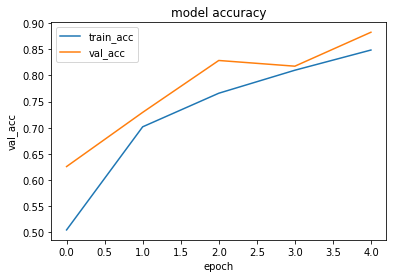

In [129]:
print(history5.history.keys())
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

### Model -6

In [130]:
model6 = Sequential()

In [131]:
model6.add(Dense(600, activation='tanh', input_shape=(16,)))
model6.add(Dense(500, activation='tanh'))
model6.add(Dense(400, activation='tanh'))
model6.add(Dense(300, activation='tanh'))
model6.add(Dense(200, activation='tanh'))
model6.add(Dense(100, activation='tanh'))
model6.add(Dense(26, activation='softmax'))

In [132]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_60 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_61 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_62 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_63 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_65 (Dense)             (None, 26)                2626      
Total para

In [133]:
model6.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [134]:
history6 = model6.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
2s - loss: 1.7957 - acc: 0.4814 - val_loss: 1.2171 - val_acc: 0.6431
Epoch 2/5
2s - loss: 1.0398 - acc: 0.6949 - val_loss: 0.8800 - val_acc: 0.7350
Epoch 3/5
2s - loss: 0.8037 - acc: 0.7620 - val_loss: 0.6754 - val_acc: 0.7975
Epoch 4/5
3s - loss: 0.6538 - acc: 0.8061 - val_loss: 0.4978 - val_acc: 0.8591
Epoch 5/5
2s - loss: 0.5415 - acc: 0.8360 - val_loss: 0.4390 - val_acc: 0.8756


In [212]:
sum1 = sum(history6.history['acc'])/epoch
train_acc.append(sum1)
x,a = model6.evaluate(x_test,y_test)
test_acc.append(a)

3616/4000 [==========================>...] - ETA: 0s

In [213]:
test_acc

[0.68525000000000003,
 0.76875000000000004,
 0.82250000000000001,
 0.82199999999999995,
 0.82125000000000004,
 0.84575]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


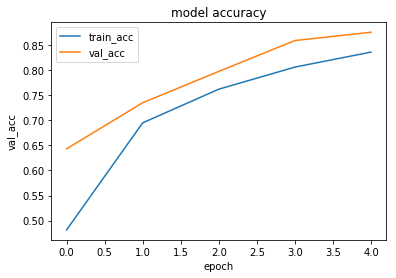

In [136]:
print(history6.history.keys())
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

### Model -7

In [140]:
model7 = Sequential()

In [141]:
model7.add(Dense(600, activation='tanh', input_shape=(16,)))
model7.add(Dense(500, activation='tanh'))
model7.add(Dense(400, activation='tanh'))
model7.add(Dense(300, activation='tanh'))
model7.add(Dense(200, activation='tanh'))
model7.add(Dense(100, activation='tanh'))
model7.add(Dense(80, activation='tanh'))
model7.add(Dense(26, activation='softmax'))

In [142]:
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_75 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_76 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_77 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_78 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_79 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_80 (Dense)             (None, 80)                8080      
__________

In [143]:
model7.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [144]:
history7 = model7.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
3s - loss: 1.9463 - acc: 0.4484 - val_loss: 1.2836 - val_acc: 0.6362
Epoch 2/5
2s - loss: 1.1337 - acc: 0.6784 - val_loss: 0.8840 - val_acc: 0.7431
Epoch 3/5
2s - loss: 0.8984 - acc: 0.7327 - val_loss: 0.6978 - val_acc: 0.7887
Epoch 4/5
2s - loss: 0.7437 - acc: 0.7742 - val_loss: 0.5968 - val_acc: 0.8291
Epoch 5/5
2s - loss: 0.6315 - acc: 0.8053 - val_loss: 0.7403 - val_acc: 0.7606


In [214]:
sum1 = sum(history7.history['acc'])/epoch
train_acc.append(sum1)
x,a = model7.evaluate(x_test,y_test)
test_acc.append(a)

3648/4000 [==========================>...] - ETA: 0s

In [215]:
test_acc

[0.68525000000000003,
 0.76875000000000004,
 0.82250000000000001,
 0.82199999999999995,
 0.82125000000000004,
 0.84575,
 0.73124999999999996]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


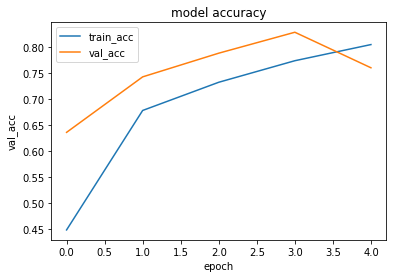

In [146]:
print(history7.history.keys())
plt.plot(history7.history['acc'])
plt.plot(history7.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

### Model -8

In [149]:
model8 = Sequential()

In [150]:
model8.add(Dense(600, activation='tanh', input_shape=(16,)))
model8.add(Dense(500, activation='tanh'))
model8.add(Dense(400, activation='tanh'))
model8.add(Dense(300, activation='tanh'))
model8.add(Dense(200, activation='tanh'))
model8.add(Dense(100, activation='tanh'))
model8.add(Dense(80, activation='tanh'))
model8.add(Dense(70, activation='tanh'))
model8.add(Dense(26, activation='softmax'))

In [151]:
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 600)               10200     
_________________________________________________________________
dense_92 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_93 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_94 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_95 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_96 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_97 (Dense)             (None, 80)                8080      
__________

In [152]:
model8.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [153]:
history8 = model8.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
3s - loss: 2.0331 - acc: 0.4256 - val_loss: 1.3727 - val_acc: 0.6100
Epoch 2/5
2s - loss: 1.1897 - acc: 0.6620 - val_loss: 1.1372 - val_acc: 0.6594
Epoch 3/5
2s - loss: 0.8983 - acc: 0.7344 - val_loss: 0.9395 - val_acc: 0.7200
Epoch 4/5
2s - loss: 0.7295 - acc: 0.7847 - val_loss: 0.6013 - val_acc: 0.8294
Epoch 5/5
2s - loss: 0.5982 - acc: 0.8175 - val_loss: 0.6584 - val_acc: 0.7947


In [216]:
sum1 = sum(history8.history['acc'])/epoch
train_acc.append(sum1)
x,a = model8.evaluate(x_test,y_test)
test_acc.append(a)

3744/4000 [===========================>..] - ETA: 0s

In [217]:
test_acc

[0.68525000000000003,
 0.76875000000000004,
 0.82250000000000001,
 0.82199999999999995,
 0.82125000000000004,
 0.84575,
 0.73124999999999996,
 0.72524999999999995]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


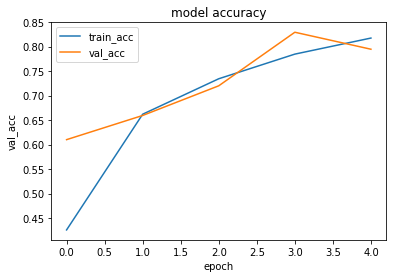

In [155]:
print(history8.history.keys())
plt.plot(history8.history['acc'])
plt.plot(history8.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

### Model -9

In [156]:
model9 = Sequential()

In [157]:
model9.add(Dense(600, activation='tanh', input_shape=(16,)))
model9.add(Dense(500, activation='tanh'))
model9.add(Dense(400, activation='tanh'))
model9.add(Dense(300, activation='tanh'))
model9.add(Dense(200, activation='tanh'))
model9.add(Dense(100, activation='tanh'))
model9.add(Dense(80, activation='tanh'))
model9.add(Dense(70, activation='tanh'))
model9.add(Dense(26, activation='softmax'))

In [158]:
model9.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [159]:
history9 = model9.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5, 
          validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
3s - loss: 2.0346 - acc: 0.4420 - val_loss: 1.3273 - val_acc: 0.6269
Epoch 2/5
2s - loss: 1.1991 - acc: 0.6627 - val_loss: 1.0564 - val_acc: 0.6981
Epoch 3/5
2s - loss: 0.9219 - acc: 0.7302 - val_loss: 0.7161 - val_acc: 0.7953
Epoch 4/5
2s - loss: 0.7505 - acc: 0.7782 - val_loss: 0.6528 - val_acc: 0.7937
Epoch 5/5
2s - loss: 0.6157 - acc: 0.8143 - val_loss: 0.5405 - val_acc: 0.8331


In [218]:
sum1 = sum(history9.history['acc'])/epoch
train_acc.append(sum1)
x,a = model9.evaluate(x_test,y_test)
test_acc.append(a)

4000/4000 [==============================] - 0s     


In [219]:
test_acc

[0.68525000000000003,
 0.76875000000000004,
 0.82250000000000001,
 0.82199999999999995,
 0.82125000000000004,
 0.84575,
 0.73124999999999996,
 0.72524999999999995,
 0.80900000000000005]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


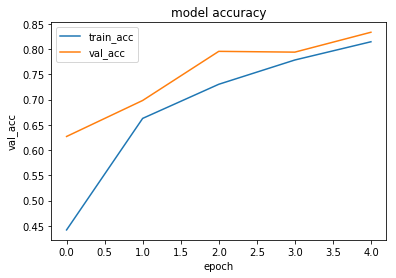

In [161]:
print(history9.history.keys())
plt.plot(history9.history['acc'])
plt.plot(history9.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('val_acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

### Model -10

In [220]:
model10 = Sequential()

In [222]:
#model10.add(Dropout(0.2, input_shape=(16,)))  #dropout is used in the visible layer
model10.add(Dense(500, activation='tanh',input_shape = (16,)))
model10.add(Dense(400, activation='tanh'))
model10.add(Dense(300, activation='tanh'))
model10.add(Dense(200, activation='tanh'))
model10.add(Dense(100, activation='tanh'))
model10.add(Dense(80, activation='tanh'))
model10.add(Dense(70, activation='tanh'))
model10.add(Dense(60, activation='tanh'))
model10.add(Dense(26, activation='softmax'))

In [223]:
model10.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [224]:
#callbacks =[EarlyStopping(monitor='val_acc', patience=2, verbose=0)]

In [225]:
history10 = model10.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 5,
         validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/5
2s - loss: 2.1251 - acc: 0.4095 - val_loss: 1.4883 - val_acc: 0.5881
Epoch 2/5
1s - loss: 1.2844 - acc: 0.6437 - val_loss: 1.0791 - val_acc: 0.6872
Epoch 3/5
1s - loss: 0.9917 - acc: 0.7191 - val_loss: 1.0524 - val_acc: 0.7087
Epoch 4/5
1s - loss: 0.8313 - acc: 0.7598 - val_loss: 0.6563 - val_acc: 0.8078
Epoch 5/5
1s - loss: 0.7011 - acc: 0.7933 - val_loss: 0.6180 - val_acc: 0.8134


In [226]:
sum1 = sum(history10.history['acc'])/epoch
train_acc.append(sum1)
x,a = model10.evaluate(x_test,y_test)
test_acc.append(a)

3744/4000 [===========================>..] - ETA: 0s

In [227]:
test_acc

[0.68525000000000003,
 0.76875000000000004,
 0.82250000000000001,
 0.82199999999999995,
 0.82125000000000004,
 0.84575,
 0.73124999999999996,
 0.72524999999999995,
 0.80900000000000005,
 0.73999999999999999]

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


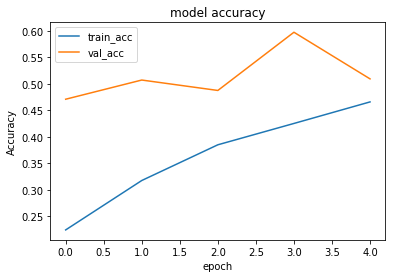

In [172]:
print(history10.history.keys())
plt.plot(history10.history['acc'])
plt.plot(history10.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

In [173]:
model10.predict_classes(x_train,batch_size=batch_size,verbose = 0)

array([19,  3,  3, ...,  3, 23,  6])

### Plotting the graph for all models

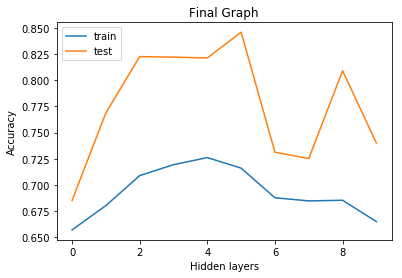

In [228]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel('Hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.title('Final Graph')

### Early stopping

In [188]:
callbacks = [EarlyStopping(monitor='val_loss',verbose=0,mode='min',patience=0)]

In [189]:
history10 = model10.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs= 10,
          callbacks = callbacks,
         validation_split = .2,
          verbose=2)


Train on 12800 samples, validate on 3200 samples
Epoch 1/10
1s - loss: 1.7142 - acc: 0.4887 - val_loss: 1.8526 - val_acc: 0.4381
Epoch 2/10
1s - loss: 1.6363 - acc: 0.5070 - val_loss: 1.7437 - val_acc: 0.4569
Epoch 3/10
1s - loss: 1.5510 - acc: 0.5400 - val_loss: 1.7880 - val_acc: 0.4544
